Jason Smith  
Student ID: 293963  
jsmi268@wgu.edu  
WGU - MSDA  
D209- Data Mining I, Task 2
Data - Medical  
Program Mentor: Christiana Okhipo  

In [1]:
# Import libraries, set display parameters, import data set

In [2]:
# B3. List the packages or libraries you have chosen for Python and justify how each item on the list supports the analysis.

# Pandas -  supports ability to create dataframes and multi-dimensional arrays
import pandas as pd

# Numpy - Used to create error curves which helped to determine an ideal K-value. Used in section D2
import numpy as np

# Seaborn - data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#MSE using scikit – learn:
from sklearn.metrics import mean_squared_error
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier  

# # Mute copy warnings
# import warnings
# from pandas.core.common import SettingWithCopyWarning
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Split data into train and test sets
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Determine accuracy_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Import Confusion Matrix to determine outcome ratios (TN,TP, FN,FP)
from sklearn.metrics import confusion_matrix

# Import graphviz, StringIO, Image, pydotplus functions for flow chart graphics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

# Change display max rows and columns
pd.options.display.max_rows = None
pd.set_option("display.max_columns", 1000)





In [3]:
# Import Clean Data Set 
df = pd.read_csv('med_data_clean.csv', index_col=False)


Part III: Data Preparation  
C3. Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

In [4]:
# Identify number of rows and columns in the data set
print("# of rows: ", df.shape[0])
print("# of columns: ", df.shape[1])

# of rows:  9999
# of columns:  52


In [5]:
# Describe data set
df.describe()

,Unnamed: 0,Zip,Latitude,Longitude,Population,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,TotalCharge,Additional_charges,Admissions,Treatment,Visits,Reliability,Options,Hours,Curteous,Dr_comm,Children,Age,Income,Overweight,Anxiety,Initial_days
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5000.000000,50162.829383,38.750924,-91.244184,9962.09761,19.412574,5.012201,1.001500,0.398840,5891.257302,12934.657732,3.518752,3.506751,3.511151,3.515252,3.496950,3.522252,3.493949,3.509751,2.098660,53.296795,40479.829026,0.709214,0.322255,33.938594
std,2886.607005,27468.724995,5.403327,15.206357,14822.13967,6.723606,1.045787,1.008118,0.628507,3377.610179,6542.915985,1.032006,1.034864,1.032794,1.036223,1.030232,1.032130,1.021444,1.042352,1.855754,17.994487,24880.572722,0.431281,0.443767,24.852238
min,1.000000,610.000000,17.967190,-174.209690,0.00000,9.519012,1.000000,0.000000,0.000000,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,18.000000,154.080000,0.000000,0.000000,1.000000
25%,2500.500000,27600.500000,35.255120,-97.353525,694.50000,16.513078,4.000000,0.000000,0.000000,3252.917043,7986.270943,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,41.000000,23948.445000,0.000000,0.000000,8.000000
50%,5000.000000,50208.000000,39.419060,-88.399240,2765.00000,18.080368,5.000000,1.000000,0.000000,5851.488972,11573.903260,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.058606,53.300937,40484.397511,1.000000,0.000000,34.000000
75%,7499.500000,72412.500000,42.044220,-80.439205,13938.00000,19.789360,6.000000,2.000000,1.000000,7614.327715,15626.601495,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,65.000000,46463.540000,1.000000,1.000000,59.000000
max,9999.000000,99929.000000,70.560990,-65.290170,122814.00000,53.019124,9.000000,7.000000,5.000000,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000,89.000000,207249.130000,1.000000,1.000000,71.000000


In [6]:
# Rename mis-spelled column
df.rename(columns={'Curteous':'Courteous'},  inplace=True, errors='raise')

In [7]:
# Create subset of the data
df3 = df[['Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Initial_admin', 'Complication_risk', 'Services', 'Courteous'
        , 'Initial_days', 'Doc_visits', 'Population', 'Treatment'
        , 'Hours', 'Admissions', 'Income', 'Children', 'TotalCharge', 'Additional_charges', 'VitD_levels','ReAdmis']]

df3.head()

,Soft_drink,HighBlood,Stroke,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_admin,Complication_risk,Services,Courteous,Initial_days,Doc_visits,Population,Treatment,Hours,Admissions,Income,Children,TotalCharge,Additional_charges,VitD_levels,ReAdmis
0,No,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Emergency Admission,Medium,Blood Work,3,15,6,2951,3,3,3,46805.99000,3.000000,3191.048774,17939.403420,17.802330,No
1,No,Yes,No,No,No,No,No,No,Yes,No,Emergency Admission,High,Intravenous,3,4,4,11303,4,4,3,14370.14000,3.000000,4214.905346,17612.998120,18.994640,No
2,No,Yes,No,No,Yes,No,No,No,No,No,Elective Admission,Medium,Blood Work,3,1,4,17125,4,4,2,39741.49000,0.000000,2177.586768,17505.192460,17.415889,No
3,No,No,Yes,Yes,No,No,No,No,Yes,Yes,Elective Admission,Medium,Blood Work,5,1,4,2162,5,5,3,1209.56000,2.035524,2465.118965,12993.437350,17.420079,No
4,Yes,No,No,No,No,Yes,No,Yes,No,No,Elective Admission,Low,CT Scan,4,5,5,5287,1,3,2,40484.44717,2.079285,1885.655137,3716.525786,16.870524,No


In [8]:
# Identify data types and whether Null values exist
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Soft_drink          9999 non-null   object 
 1   HighBlood           9999 non-null   object 
 2   Stroke              9999 non-null   object 
 3   Arthritis           9999 non-null   object 
 4   Diabetes            9999 non-null   object 
 5   Hyperlipidemia      9999 non-null   object 
 6   BackPain            9999 non-null   object 
 7   Allergic_rhinitis   9999 non-null   object 
 8   Reflux_esophagitis  9999 non-null   object 
 9   Asthma              9999 non-null   object 
 10  Initial_admin       9999 non-null   object 
 11  Complication_risk   9999 non-null   object 
 12  Services            9999 non-null   object 
 13  Courteous           9999 non-null   int64  
 14  Initial_days        9999 non-null   int64  
 15  Doc_visits          9999 non-null   int64  
 16  Popula

In [10]:
# Create data frame containing discrete variables
disc_df = df[['ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Arthritis', 'Diabetes', 'Hyperlipidemia',
       'BackPain', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services','Admissions',
       'Treatment', 'Visits', 'Reliability', 'Options', 'Hours', 'Courteous',
       'Dr_comm','Overweight', 'Initial_days']]
disc_df.head()

,ReAdmis,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Admissions,Treatment,Visits,Reliability,Options,Hours,Courteous,Dr_comm,Overweight,Initial_days
0,No,6,0,0,No,Emergency Admission,Yes,No,Medium,Yes,Yes,No,Yes,Yes,No,Yes,Blood Work,3,3,2,2,4,3,3,4,1.0,15
1,No,4,2,1,No,Emergency Admission,Yes,No,High,No,No,No,No,No,Yes,No,Intravenous,3,4,3,4,4,4,3,3,1.0,4
2,No,4,1,0,No,Elective Admission,Yes,No,Medium,No,Yes,No,No,No,No,No,Blood Work,2,4,4,4,3,4,3,3,0.0,1
3,No,4,1,0,No,Elective Admission,No,Yes,Medium,Yes,No,No,No,No,Yes,Yes,Blood Work,3,5,5,3,4,5,5,5,0.0,1
4,No,5,0,2,Yes,Elective Admission,No,No,Low,No,No,Yes,No,Yes,No,No,CT Scan,2,1,3,3,5,3,4,3,1.0,5


In [28]:
# Cross tabulation of discrete target and features
contvars = ['VitD_levels', 'Initial_days', 'Overweight']
for a in disc_df.columns:
    if a not in contvars:
        print(pd.crosstab(disc_df.ReAdmis, disc_df[a]), '\n', '--------------------------------')
#table = pd.crosstab(df.ReAdmis, df.Services)
#table

ReAdmis    No   Yes
ReAdmis            
No       6331     0
Yes         0  3668 
 --------------------------------
Doc_visits  1   2    3     4     5     6    7   8  9
ReAdmis                                             
No          4  36  375  1511  2416  1558  392  37  2
Yes         2  22  220   874  1406   878  242  24  0 
 --------------------------------
Full_meals_eaten     0     1     2    3    4   5  6  7
ReAdmis                                               
No                2332  2298  1169  395  116  14  5  2
Yes               1382  1317   687  217   53  11  1  0 
 --------------------------------
VitD_supp     0     1    2   3  4  5
ReAdmis                             
No         4282  1668  325  51  4  1
Yes        2420  1015  219  13  1  0 
 --------------------------------
Soft_drink    No   Yes
ReAdmis               
No          5109  1222
Yes         2946   722 
 --------------------------------
Initial_admin  Elective Admission  Emergency Admission  Observation Admis

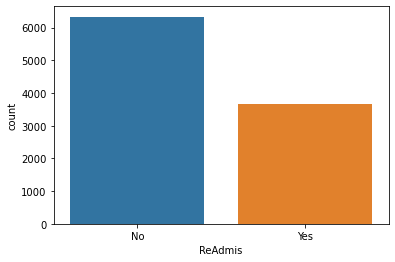

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


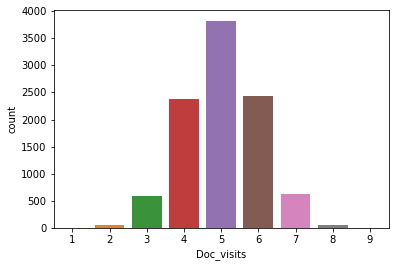

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


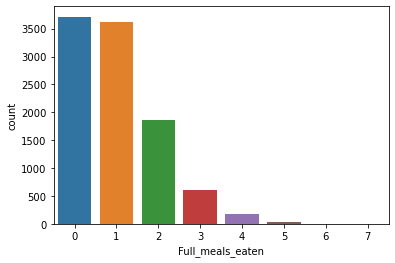

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


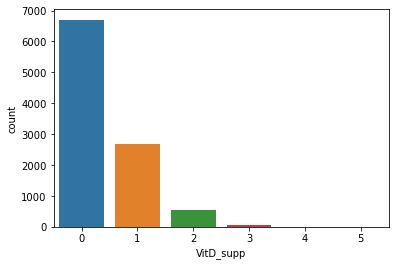

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


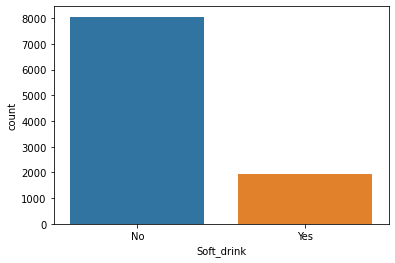

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


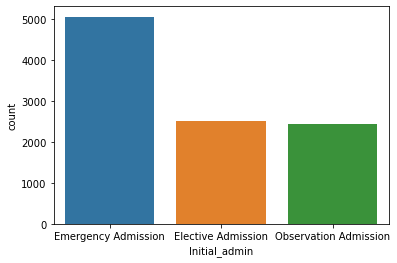

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


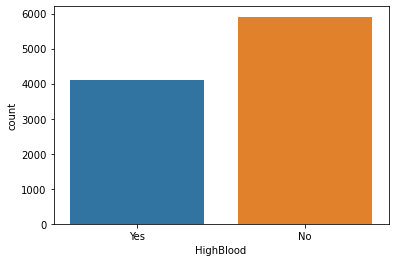

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


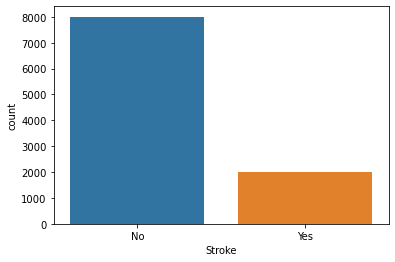

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


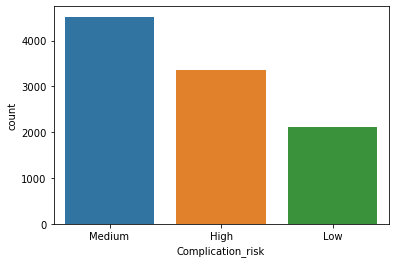

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


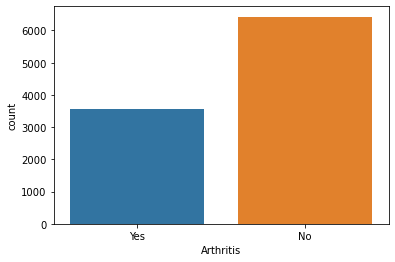

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


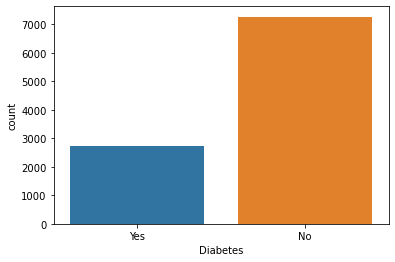

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


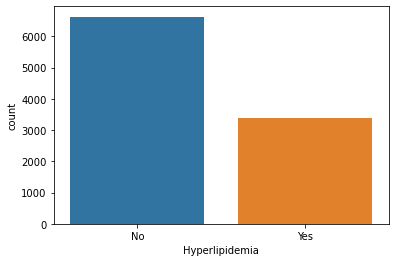

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


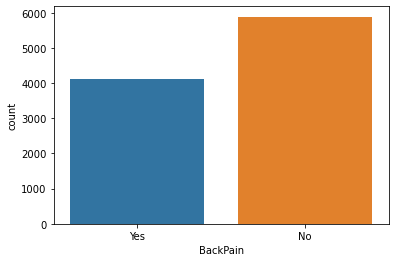

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


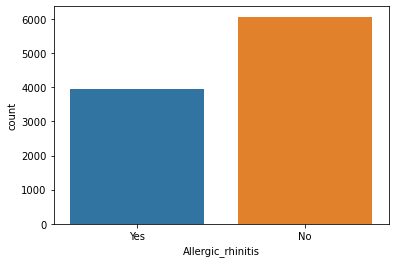

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


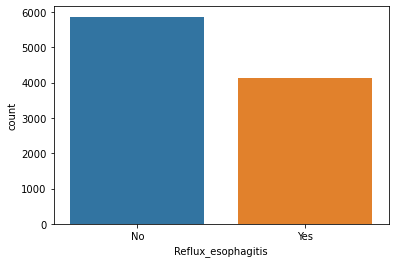

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


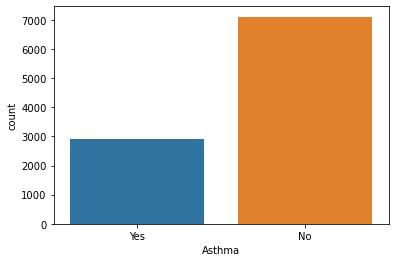

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


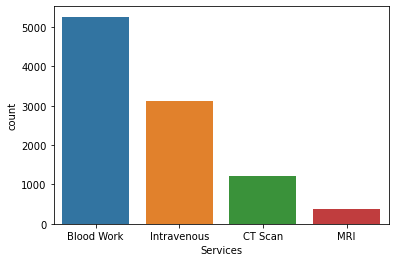

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


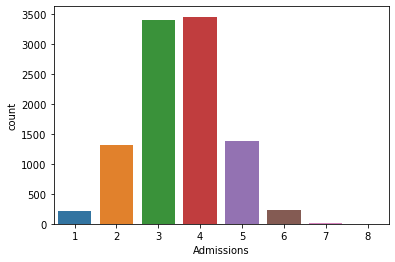

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


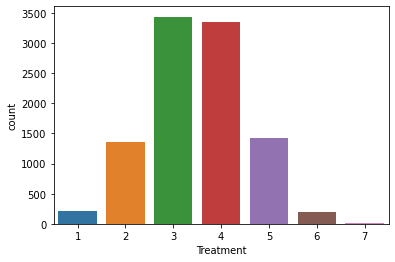

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


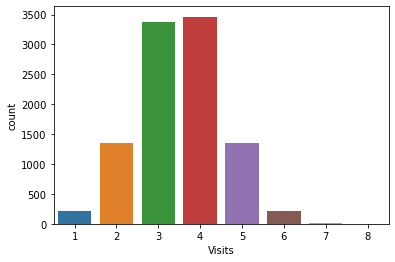

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


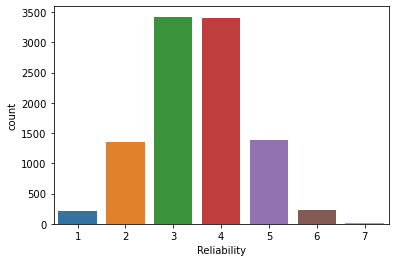

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


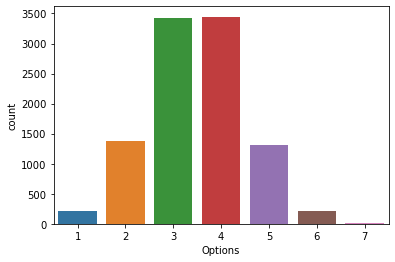

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


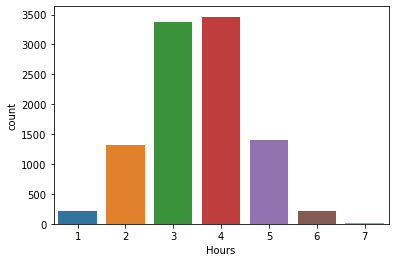

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


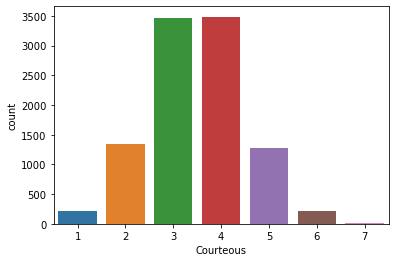

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


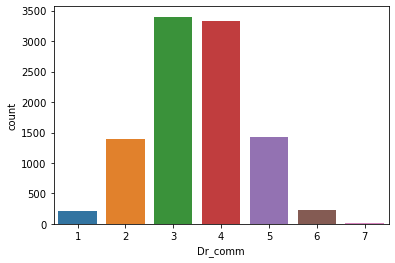

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


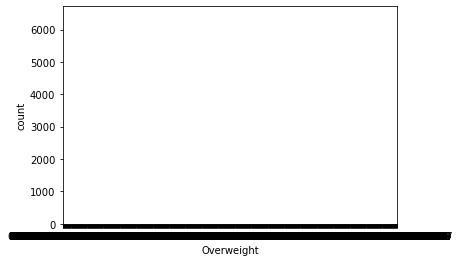

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


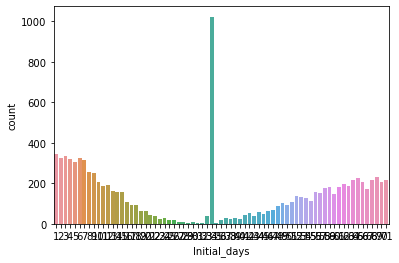

AxesSubplot(0.125,0.125;0.775x0.755) None 
 --------------------------------


In [11]:
# Countplot of discrete target and features

for a in disc_df.columns:
    print(sns.countplot(data = df
            ,x = df[a]
            ),
              plt.show(),'\n', '--------------------------------')

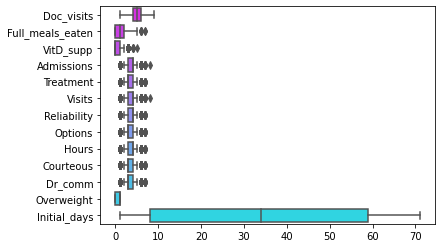

In [12]:
#Boxplot of discrete target and features         

# Box plot
ax = sns.boxplot(data=disc_df,orient="h",  palette="cool_r")

#*** convert to numbers

In [13]:
# Correlation table of  target and features
corrmat = df.corr()
corrmat

,Unnamed: 0,Zip,Latitude,Longitude,Population,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,TotalCharge,Additional_charges,Admissions,Treatment,Visits,Reliability,Options,Hours,Courteous,Dr_comm,Children,Age,Income,Overweight,Anxiety,Initial_days
Unnamed: 0,1.000000,0.013585,-0.009642,-0.015706,0.008380,-0.001687,-0.004854,-0.020067,0.023993,0.531251,0.002006,-0.017503,-0.006797,-0.009068,-0.014041,-0.003922,-0.006882,0.004427,-0.015395,-0.000204,-0.006411,-0.016326,-0.012664,0.007218,0.787019
Zip,0.013585,1.000000,-0.029288,-0.900687,0.031236,-0.008274,0.000836,0.011896,0.008736,0.002586,0.003465,-0.005697,-0.002360,-0.009299,-0.001685,0.004714,0.002188,-0.003973,-0.013338,-0.004688,-0.012092,0.005681,-0.018493,-0.001476,0.013180
Latitude,-0.009642,-0.029288,1.000000,-0.112375,-0.207689,-0.004279,0.008380,0.003433,0.001255,-0.010733,-0.002276,0.008599,0.007429,0.014342,-0.015548,-0.001408,0.010649,0.009625,0.001749,-0.008499,0.004048,-0.017091,-0.008005,0.013909,0.001717
Longitude,-0.015706,-0.900687,-0.112375,1.000000,-0.032141,-0.000274,0.000755,-0.014160,-0.002031,-0.004444,0.000094,0.004771,-0.002487,-0.000764,0.003615,-0.003261,-0.007620,0.001041,0.009289,0.003434,0.014391,-0.007428,0.022636,0.001188,-0.014038
Population,0.008380,0.031236,-0.207689,-0.032141,1.000000,0.002478,0.012651,-0.025403,0.009580,0.013578,-0.004780,0.014216,0.023722,-0.001143,-0.004350,0.008810,0.007652,0.009931,-0.000115,0.012288,-0.017060,0.005816,0.003598,0.001832,0.003740
VitD_levels,-0.001687,-0.008274,-0.004279,-0.000274,0.002478,1.000000,0.001483,0.008706,0.010481,0.728282,0.016372,-0.003952,-0.017545,-0.012753,0.012958,-0.011912,0.007620,0.001854,0.003878,-0.011364,-0.006294,-0.001694,0.011097,0.016975,-0.003378
Doc_visits,-0.004854,0.000836,0.008380,0.000755,0.012651,0.001483,1.000000,-0.002769,0.005682,-0.004514,0.008071,0.003680,0.006024,-0.002719,-0.006540,-0.009435,0.012536,0.008590,0.004570,0.003094,0.012148,-0.011673,0.011925,0.011430,-0.012221
Full_meals_eaten,-0.020067,0.011896,0.003433,-0.014160,-0.025403,0.008706,-0.002769,1.000000,-0.019887,-0.007781,0.018745,0.003770,-0.002071,0.008197,-0.009166,0.009490,0.004534,0.004137,-0.018432,0.007703,-0.008104,-0.001739,-0.005049,-0.009019,-0.019470
VitD_supp,0.023993,0.008736,0.001255,-0.002031,0.009580,0.010481,0.005682,-0.019887,1.000000,0.020925,0.010347,-0.003051,-0.003371,0.004396,0.006017,0.005586,-0.007361,-0.008860,-0.005937,-0.003643,0.004946,-0.005328,-0.007188,0.009985,0.012812
TotalCharge,0.531251,0.002586,-0.010733,-0.004444,0.013578,0.728282,-0.004514,-0.007781,0.020925,1.000000,0.029957,-0.019177,-0.018795,-0.013071,0.006119,-0.008748,-0.002517,0.006731,0.002831,-0.004353,0.000181,-0.006803,-0.005373,0.018120,0.554804


Text(0.5, 1.0, 'Heatmap of discrete target and features')

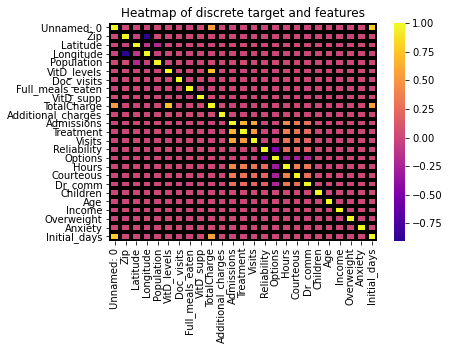

In [14]:
# Heatmap of discrete target and features
heatmap = sns.heatmap(data=corrmat, cmap="plasma", center = 0 ,
linewidths = 3, linecolor = "Black",
xticklabels = True, yticklabels = True)
plt.xticks(rotation=90)
plt.title('Heatmap of discrete target and features')

In [15]:
# Encode binary data values 
df3.loc[:,     'ReAdmis'] = [1 if value=='Yes' else 0 for value in df3['ReAdmis']]
df3.loc[:,     'Soft_drink'] =  [1 if value=='Yes' else 0 for value in df3['Soft_drink']]
df3.loc[:,     'HighBlood'] =  [1 if value=='Yes' else 0 for value in df3['HighBlood']]
df3.loc[:,     'Stroke'] =  [1 if value=='Yes' else 0 for value in df3['Stroke']]
df3.loc[:,     'Arthritis'] =  [1 if value=='Yes' else 0 for value in df3['Arthritis']]
df3.loc[:,     'Diabetes'] =  [1 if value=='Yes' else 0 for value in df3['Diabetes']]
df3.loc[:,     'Hyperlipidemia'] =  [1 if value=='Yes' else 0 for value in df3['Hyperlipidemia']]
df3.loc[:,     'BackPain'] =  [1 if value=='Yes' else 0 for value in df3['BackPain']]
df3.loc[:,     'Allergic_rhinitis'] =  [1 if value=='Yes' else 0 for value in df3['Allergic_rhinitis']]
df3.loc[:,     'Reflux_esophagitis'] =  [1 if value=='Yes' else 0 for value in df3['Reflux_esophagitis']]
df3.loc[:,     'Asthma'] =  [1 if value=='Yes' else 0 for value in df3['Asthma']]

# Encode Categorical Data
# Instantiate LabelEncoder

le = LabelEncoder()

df3.loc[:,'Initial_admin'] = le.fit_transform(df3.loc[:,'Initial_admin'])
    # 'Emergency Admission' = 1, 'Elective Admission' = 0, 'Observation Admission' = 3
df3.loc[:,'Complication_risk'] = le.fit_transform(df3.loc[:,'Complication_risk'])    
    # 'Medium' = 2, 'High'= 0, "low" = 1 
    
df3.loc[:,'Services'] = le.fit_transform(df3.loc[:,'Services']) 
    # 'Blood Work' = 0, 'Intravenous'= 2, 'CT Scan' = 1, 'MRI' = 3

df3.head()

C:\Users\smith\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Soft_drink,HighBlood,Stroke,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_admin,Complication_risk,Services,Courteous,Initial_days,Doc_visits,Population,Treatment,Hours,Admissions,Income,Children,TotalCharge,Additional_charges,VitD_levels,ReAdmis
0,0,1,0,1,1,0,1,1,0,1,1,2,0,3,15,6,2951,3,3,3,46805.99000,3.000000,3191.048774,17939.403420,17.802330,0
1,0,1,0,0,0,0,0,0,1,0,1,0,2,3,4,4,11303,4,4,3,14370.14000,3.000000,4214.905346,17612.998120,18.994640,0
2,0,1,0,0,1,0,0,0,0,0,0,2,0,3,1,4,17125,4,4,2,39741.49000,0.000000,2177.586768,17505.192460,17.415889,0
3,0,0,1,1,0,0,0,0,1,1,0,2,0,5,1,4,2162,5,5,3,1209.56000,2.035524,2465.118965,12993.437350,17.420079,0
4,1,0,0,0,0,1,0,1,0,0,0,1,1,4,5,5,5287,1,3,2,40484.44717,2.079285,1885.655137,3716.525786,16.870524,0


In [16]:
# Create data frame
dataset =df3[['Initial_days', 'VitD_levels', 'Income', 'Children', 'TotalCharge', 'Additional_charges', 'Admissions', 'Treatment','Doc_visits', 'Population', 'Hours', 'Courteous', 'ReAdmis']]
#dataset =df3[['Initial_days', 'VitD_levels', 'TotalCharge','Treatment','Doc_visits', 'popclass', 'ReAdmis']]
#dataset =df3.loc[['Initial_days', 'VitVitD_levels', 'Doc_visits', 'popclass', 'ReAdmis']]
#dataset =df3[['Initial_days', 'VitD_levels', 'ReAdmis']]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Initial_days        9999 non-null   int64  
 1   VitD_levels         9999 non-null   float64
 2   Income              9999 non-null   float64
 3   Children            9999 non-null   float64
 4   TotalCharge         9999 non-null   float64
 5   Additional_charges  9999 non-null   float64
 6   Admissions          9999 non-null   int64  
 7   Treatment           9999 non-null   int64  
 8   Doc_visits          9999 non-null   int64  
 9   Population          9999 non-null   int64  
 10  Hours               9999 non-null   int64  
 11  Courteous           9999 non-null   int64  
 12  ReAdmis             9999 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 1015.6 KB


In [17]:
# Check for null values
df3.isna().sum()

Soft_drink            0
HighBlood             0
Stroke                0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Initial_admin         0
Complication_risk     0
Services              0
Courteous             0
Initial_days          0
Doc_visits            0
Population            0
Treatment             0
Hours                 0
Admissions            0
Income                0
Children              0
TotalCharge           0
Additional_charges    0
VitD_levels           0
ReAdmis               0
dtype: int64

In [18]:
# C4. Export clean data set
df3.to_csv("C:\\Users\\smith\\OneDrive\\Jason\\wgu\\Assignments\\D209 Data Mining 1\\Code\\nvm2.csv")

In [19]:
# Create list of feature column names
feature_cols = list(dataset.columns)
feature_cols.remove('ReAdmis')
len(feature_cols)
feature_cols

['Initial_days',
 'VitD_levels',
 'Income',
 'Children',
 'TotalCharge',
 'Additional_charges',
 'Admissions',
 'Treatment',
 'Doc_visits',
 'Population',
 'Hours',
 'Courteous']

In [20]:
# split the data into inputs and outputs
X = df3[feature_cols] # Features
y = df3.ReAdmis # Target

In [21]:
# D1. Split the data into training and test data sets and provide the file(s).
# training and testing data
from sklearn.model_selection import train_test_split

# assign train 70% and test data size 30%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size= 0.30, random_state=0)

# Create data frames
xtrain_df = pd.DataFrame(X_train)
xtest_df = pd.DataFrame(X_test)
ytrain_df = pd.DataFrame(y_train)
ytest_df = pd.DataFrame(y_test)

# # Save to CSV
xtrain_df.to_csv("C:\\Users\\smith\\OneDrive\\Jason\\wgu\\Assignments\\D209 Data Mining 1\\Code\\xtrain.csv")
xtest_df.to_csv("C:\\Users\\smith\\OneDrive\\Jason\\wgu\\Assignments\\D209 Data Mining 1\\Code\\xtest.csv")
ytrain_df.to_csv("C:\\Users\\smith\\OneDrive\\Jason\\wgu\\Assignments\\D209 Data Mining 1\\Code\\ytrain.csv")
ytest_df.to_csv("C:\\Users\\smith\\OneDrive\\Jason\\wgu\\Assignments\\D209 Data Mining 1\\Code\\ytest.csv")

In [22]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6 and 'Gini'attribute selection 
dt = DecisionTreeClassifier(criterion="gini",max_depth=6, random_state=1)
# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])
print(X_test[0:5])


[1 0 0 0 0]
      Initial_days  VitD_levels    Income  Children  TotalCharge  \
9446            69    17.991945  50379.95  2.138358  6665.738284   
898              3    21.593472  47590.26  6.000000  3922.204812   
2398            34    18.553827  13845.88  1.000000  3279.187907   
5906            58    16.755816  71296.34  2.000000  4834.978266   
2343             6    16.348032  21810.33  2.000000  2379.924849   

      Additional_charges  Admissions  Treatment  Doc_visits  Population  \
9446         5273.551391           4          4           6        1718   
898         29544.952220           4          3           4        1275   
2398        13793.131040           4          4           6        4553   
5906         9701.684999           3          3           8       15788   
2343        24637.464580           4          4           4         884   

      Hours  Courteous  
9446      3          3  
898       3          4  
2398      4          3  
5906      2          3  
234

In [23]:
# Measurements of effectiveness: precision, recall, accuracy and F1-score
target_names = ['Readmitted', 'Not Readmitted']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

    Readmitted       0.96      0.92      0.94      1903
Not Readmitted       0.87      0.94      0.91      1097

      accuracy                           0.93      3000
     macro avg       0.92      0.93      0.92      3000
  weighted avg       0.93      0.93      0.93      3000



In [24]:
# Calculation of Mean Squared Error (MSE)
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)

Mean Squared Error:  0.071


[[1754  149]
 [  64 1033]]


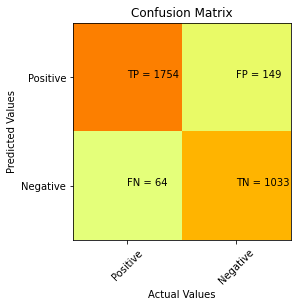

In [25]:
# Evaluating performance
# Confusion Matrix

# Instantiate an instance of confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

# If True, write the data value in each cell
sns.heatmap(cm,annot=True)
# formatting
plt.clf()
plt.imshow(cm,interpolation='nearest', cmap=plt.cm.Wistia)
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
classNames = ['Positive', 'Negative']
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
plt.title('Confusion Matrix')
s = [['TP','FP' ], ['FN','TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
# saving confusion matrix in png form
plt.savefig('confusion_Matrix.png')
#print(cm)
plt.show()